In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
# Load your dataset
df = pd.read_csv('Churn_Modelling.csv')

In [19]:
# Exclude 'Surname' from features
X = df.drop(['Surname', 'Exited'], axis=1)

In [20]:
# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

In [21]:
# Target variable
y = df['Exited']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Predictions on the test set
y_pred = model.predict(X_test)

In [25]:
# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Confusion Matrix:
 [[1607    0]
 [ 393    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


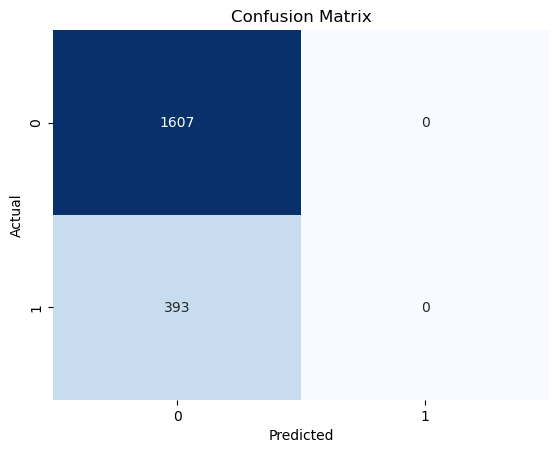

In [26]:
# Visualize the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Feature Importance (for Logistic Regression)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model.coef_[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

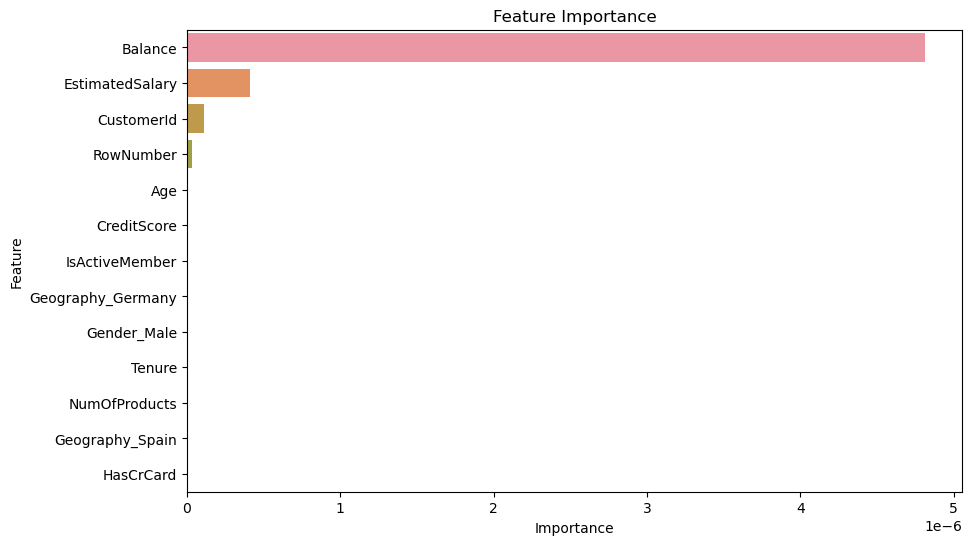

In [28]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

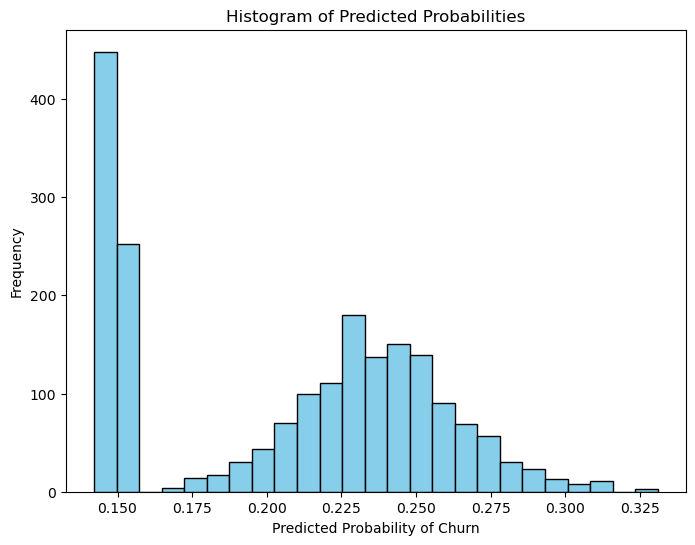

In [29]:
# Histogram of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(model.predict_proba(X_test)[:, 1], bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Probability of Churn')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()